# SUPERVISED LEARNING - KNeighbors (KNN)

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

Read in Dataset

In [2]:
iris= pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Statistical info of numeric columns

In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Dimensions of the data set

In [4]:
iris.shape

(150, 6)

Check for null values

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dropping unnecessary columns

In [6]:
iris= iris.drop(columns=['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Encode Species column using Label Encoder

In [7]:
label= LabelEncoder()
iris['Species'] = label.fit_transform(iris['Species'])
iris['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

Splitting Dataset into Train and Test data

In [8]:
x= iris.drop(['Species'], axis=1)
y= iris['Species']

In [9]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Train model

In [12]:
knn= KNeighborsClassifier(n_neighbors=5)
model=knn.fit(x_train, y_train)
model

KNeighborsClassifier()

Predict the target variable using the trained model on the dataset(x_test)

In [13]:
y_pred= model.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

Model score of our KNN model

In [14]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Our dataset overfits as a score of 100%/1.0 is overfit

# UNSUPERVISED LEARNING - KMeans algorithm

Load in dataset

In [15]:
Iris=pd.read_csv('Iris.csv')
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
Iris= Iris.drop(['Id', 'PetalLengthCm', 'PetalWidthCm'], axis=1)
Iris

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
145,6.7,3.0,Iris-virginica
146,6.3,2.5,Iris-virginica
147,6.5,3.0,Iris-virginica
148,6.2,3.4,Iris-virginica


# Visualize of the Iris dataset colored by Species

Scatterplot

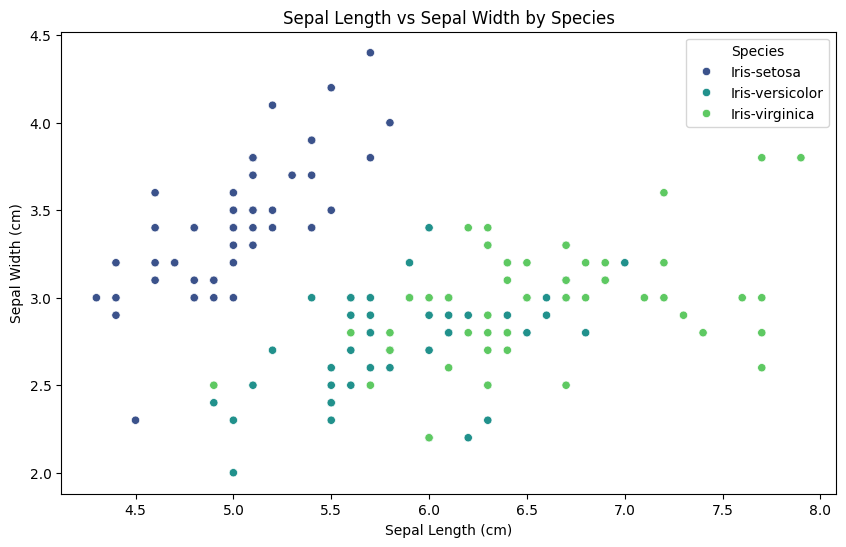

In [17]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=Iris, x="SepalLengthCm", y="SepalWidthCm", hue="Species", palette="viridis")

# Add title and labels
scatter_plot.set_title("Sepal Length vs Sepal Width by Species")
scatter_plot.set_xlabel("Sepal Length (cm)")
scatter_plot.set_ylabel("Sepal Width (cm)")

# Show the plot
plt.legend(title='Species')
plt.show()

Pairplot

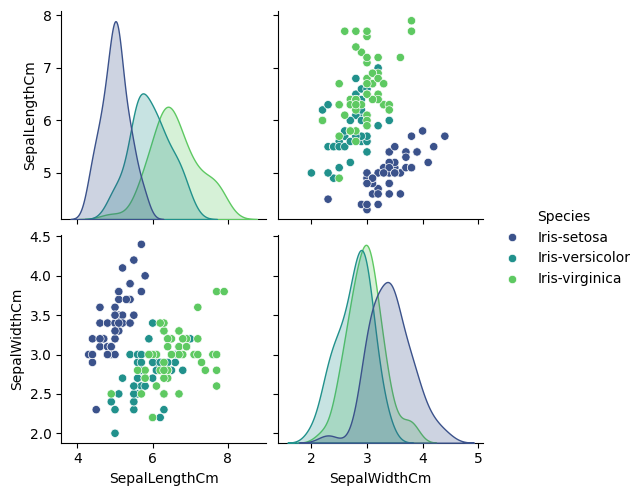

In [18]:
sns.pairplot(data= Iris, vars=['SepalLengthCm', 'SepalWidthCm'], hue= 'Species', palette= 'viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Data Visualization of Sepal columns using Scatterplot

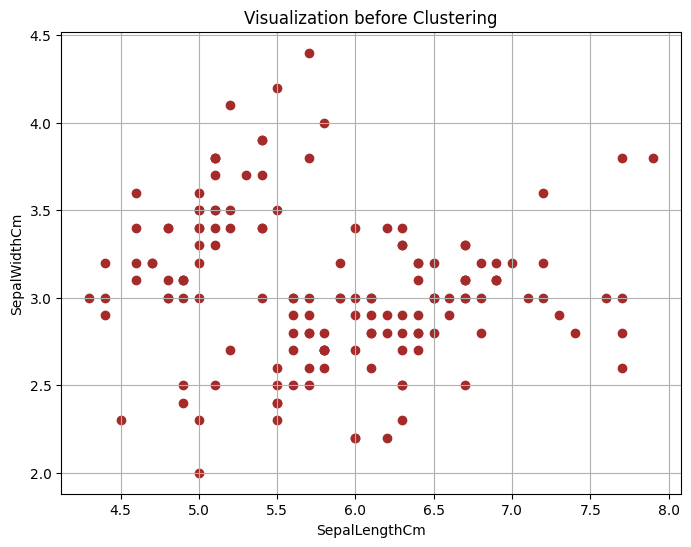

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(Iris['SepalLengthCm'], Iris['SepalWidthCm'], color='brown')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Visualization before Clustering')
plt.grid()
plt.show()

Train MODEL  on X

In [20]:
X= Iris.drop(['Species'], axis=1)
X

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# Call and Apply KMeans Model

In [21]:
# Fit the KMeans model to your data.
kmeans= KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42, copy_x=True, algorithm='lloyd')
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [22]:
#Assign Data points to Clusters
label= kmeans.predict(X)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [23]:
# Add cluster labels to the DataFrame
clusters= kmeans.labels_
Iris['Cluster'] = kmeans.labels_
Iris

,SepalLengthCm,SepalWidthCm,Species,Cluster
0,5.1,3.5,Iris-setosa,0
1,4.9,3.0,Iris-setosa,0
2,4.7,3.2,Iris-setosa,0
3,4.6,3.1,Iris-setosa,0
4,5.0,3.6,Iris-setosa,0
...,...,...,...,...
145,6.7,3.0,Iris-virginica,1
146,6.3,2.5,Iris-virginica,2
147,6.5,3.0,Iris-virginica,1
148,6.2,3.4,Iris-virginica,1


In [24]:
# Find cluster centers(centroids)
centroids = kmeans.cluster_centers_
centroids

array([[5.006     , 3.418     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [25]:
print(f"Cluster centers:\n{kmeans.cluster_centers_}")
print(f"Labels:\n{clusters}")

Cluster centers:
[[5.006      3.418     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]
Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


Data Visualization of Iris Dataset clusters using scatterplot

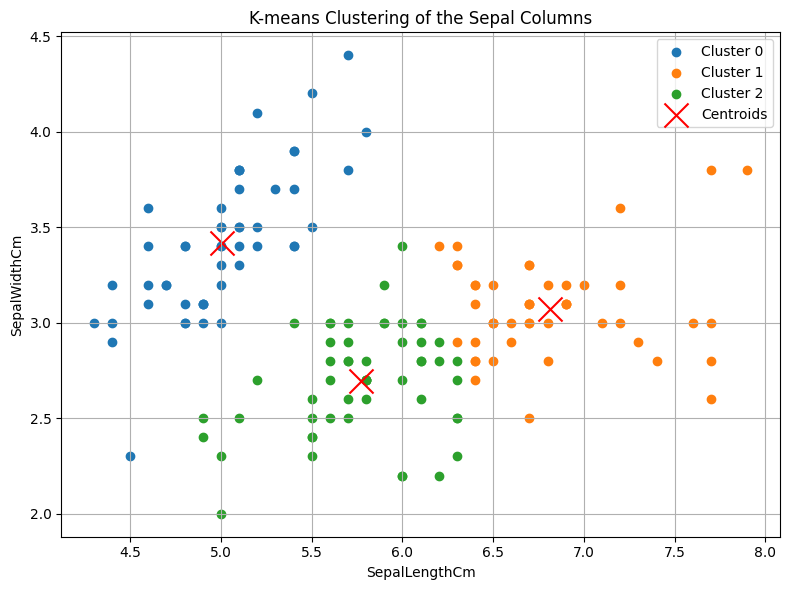

In [26]:
# Set Figure size
plt.figure(figsize=(8, 6))

for cluster_label in Iris['Cluster'].unique():
    cluster_data = Iris[Iris['Cluster'] == cluster_label]
    plt.scatter(cluster_data['SepalLengthCm'], cluster_data['SepalWidthCm'], label=f'Cluster {cluster_label}')

# Plot Scatterplot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('K-means Clustering of the Sepal Columns')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()